In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit

In [245]:
# 读取Excel文件
excel_file_path = 'BMI in AMERICA.csv'
df = pd.read_csv(excel_file_path)

In [247]:
# 提取“BMI”列的数据
bmi_data = df['BMI'].values

In [248]:
bmi_data

array([99.64, 99.34, 97.65, ..., 12.06, 12.05, 12.02])

In [254]:
# 数据分组
bin_width = 1
bins = np.arange(min(bmi_data), max(bmi_data) + bin_width, bin_width)
binss = np.arange(min(bmi_data), max(bmi_data), bin_width)

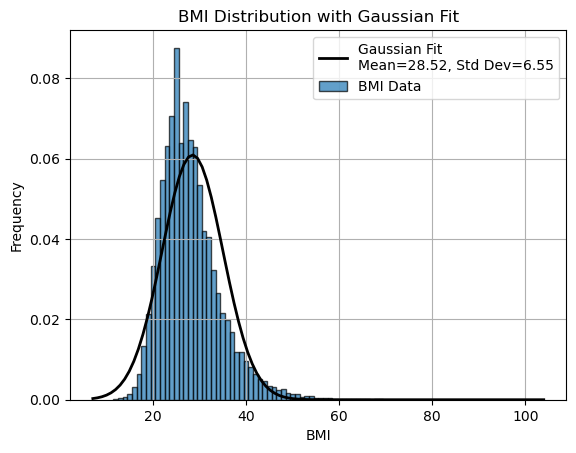

In [256]:
# 4. 获取每个组的数量
hist_counts, _ = np.histogram(bmi_data, bins=bins)
hist_counts = hist_counts / len(bmi_data)/bin_width
# 6. 绘制柱状图
plt.bar(bins[:-1], hist_counts, width=bin_width, edgecolor='black', alpha=0.7, label='BMI Data')

# 7. 计算均值和方差
mean_bmi = np.mean(bmi_data)
var_bmi = np.var(bmi_data)

# 8. 绘制均值和方差相同的高斯分布
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_bmi, np.sqrt(var_bmi))
plt.plot(x, p, 'k', linewidth=2, label='Gaussian Fit\nMean={:.2f}, Std Dev={:.2f}'.format(mean_bmi, np.sqrt(var_bmi)))

# 9. 显示图例、标签等
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution with Gaussian Fit')
plt.legend()
plt.grid(True)
plt.show()

In [257]:
def pob(x):
    total = 0
    for x_val in np.arange(0.82, x, 0.01):
        total += p_func(x_val) * 0.01
    return (1-total)

def exponential_function(x, a):
    
    return x ** (-a-1)

def fit_function(x, a):
        return (-a-1) * x

def p_func(x):
    return norm.pdf(x, mean_bmi, np.sqrt(var_bmi)) 

In [261]:
# 生成 x 值
#x_values = np.linspace(0, 50, 100) 
#x_scale = x_values * 0.03 + 0.91
x_values = np.linspace(xmin, xmax, 50)
#x_calculate = np.linspace(0, 50, 50) 
p = norm.pdf(x_values, mean_bmi, np.sqrt(var_bmi))
# 计算对应的 y 值
y_values = [pob(x) for x in x_values]

x_fit = x_values[:]
y_fit = y_values[:]
#x_fit_log = np.log(x_fit)
#y_fit_log = np.log(y_fit) 

result_dict = {}
for a in np.arange(-10,10,0.01):   
    y_cal = exponential_function(x_fit,a)
    covariance = sum((y_cal-y_fit)**2)
    result_dict[a] = covariance
    
best_a = min(result_dict, key=result_dict.get)
min_covariance = result_dict[best_a]
y_fit = exponential_function(x_fit,best_a)
print("Best a:", best_a)
print("Minimum Covariance:", min_covariance)


Best a: -0.6200000000002
Minimum Covariance: 4.7247466172573676


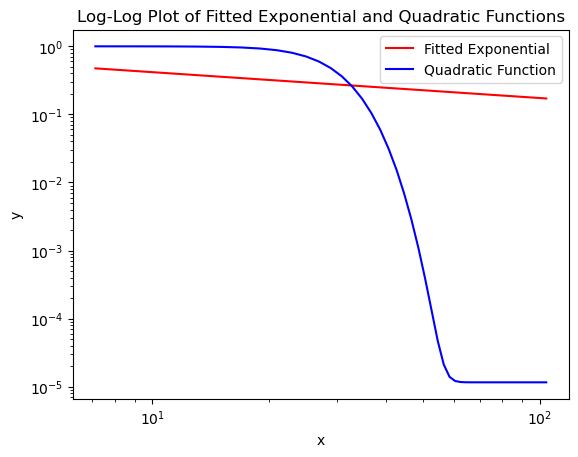

In [265]:
t = 0
s = 50

# Assuming x_values, y_values, x_fit, and y_fit are defined elsewhere in your code

# Plot the fitted exponential function
plt.plot(x_fit[t:s], y_fit[t:s], label='Fitted Exponential', linestyle='-', color='red')

# Plot the quadratic function
plt.plot(x_values[t:s], y_values[t:s], label='Quadratic Function', linestyle='-', color='blue')

# Set x-axis and y-axis to log scale
plt.xscale('log')
plt.yscale('log')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Log-Log Plot of Fitted Exponential and Quadratic Functions')
plt.legend()

# Show the plot
plt.show()
